In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('train.csv')
test_data =  pd.read_csv('test_data.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
data = data.fillna(data.median())

In [7]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [9]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
data.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [11]:
data = data.drop('Loan_ID' , axis = 1)

In [12]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [14]:
data['Status'] = encoder.fit_transform(data['Loan_Status'])

In [15]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1


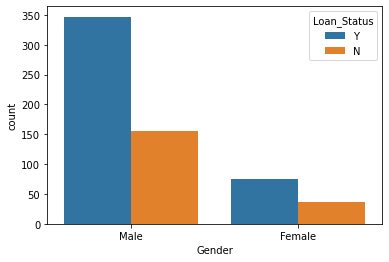

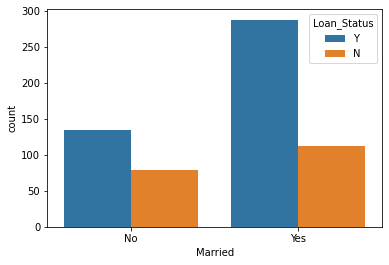

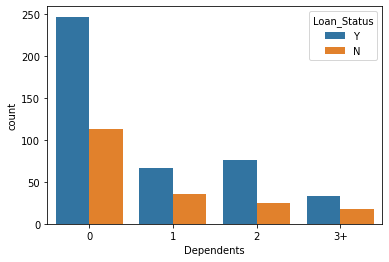

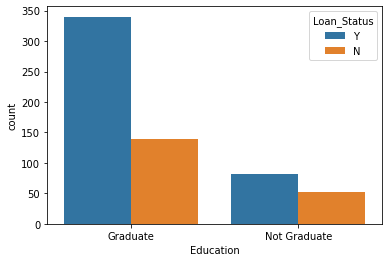

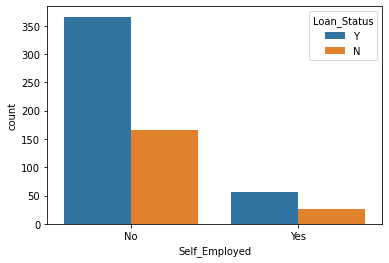

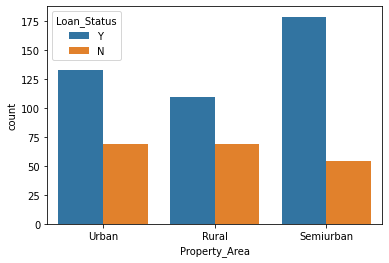

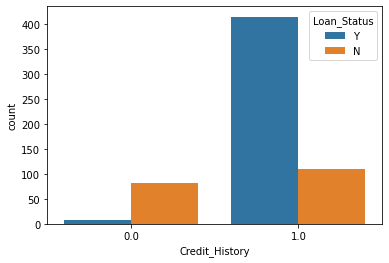

In [16]:
for i in ['Gender','Married', 'Dependents', 'Education', 'Self_Employed','Property_Area','Credit_History']:
    sns.countplot(x = data[i],data = data , hue = 'Loan_Status')
    plt.show()

In [17]:
data['Total_Income'] = data['ApplicantIncome']+data['ApplicantIncome']

In [18]:
data = pd.get_dummies(data=data , columns = ['Gender','Married', 'Dependents', 'Education',
                                             'Self_Employed','Property_Area','Credit_History'] , drop_first = True )

<AxesSubplot:>

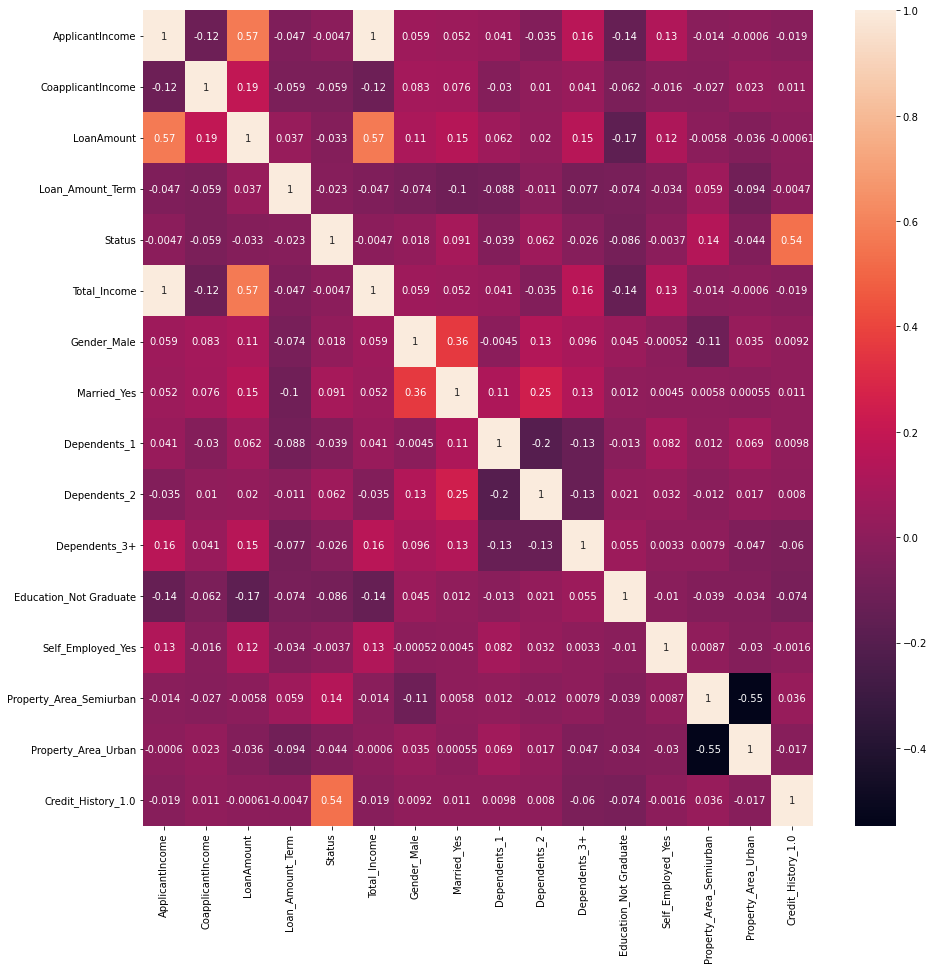

In [19]:
plt.figure(figsize = (15,15))
sns.heatmap(data.corr() , annot = True)

In [20]:
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Status,Total_Income,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Credit_History_1.0
ApplicantIncome,1.00,-0.12,0.57,-0.05,-0.00,1.00,0.06,0.05,0.04,-0.03,0.16,-0.14,0.13,-0.01,-0.00,-0.02
CoapplicantIncome,-0.12,1.00,0.19,-0.06,-0.06,-0.12,0.08,0.08,-0.03,0.01,0.04,-0.06,-0.02,-0.03,0.02,0.01
LoanAmount,0.57,0.19,1.00,0.04,-0.03,0.57,0.11,0.15,0.06,0.02,0.15,-0.17,0.12,-0.01,-0.04,-0.00
Loan_Amount_Term,-0.05,-0.06,0.04,1.00,-0.02,-0.05,-0.07,-0.10,-0.09,-0.01,-0.08,-0.07,-0.03,0.06,-0.09,-0.00
Status,-0.00,-0.06,-0.03,-0.02,1.00,-0.00,0.02,0.09,-0.04,0.06,-0.03,-0.09,-0.00,0.14,-0.04,0.54
Total_Income,1.00,-0.12,0.57,-0.05,-0.00,1.00,0.06,0.05,0.04,-0.03,0.16,-0.14,0.13,-0.01,-0.00,-0.02
Gender_Male,0.06,0.08,0.11,-0.07,0.02,0.06,1.00,0.36,-0.00,0.13,0.10,0.05,-0.00,-0.11,0.03,0.01
Married_Yes,0.05,0.08,0.15,-0.10,0.09,0.05,0.36,1.00,0.11,0.25,0.13,0.01,0.00,0.01,0.00,0.01
Dependents_1,0.04,-0.03,0.06,-0.09,-0.04,0.04,-0.00,0.11,1.00,-0.20,-0.13,-0.01,0.08,0.01,0.07,0.01
Dependents_2,-0.03,0.01,0.02,-0.01,0.06,-0.03,0.13,0.25,-0.20,1.00,-0.13,0.02,0.03,-0.01,0.02,0.01


In [21]:
data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Status,Total_Income,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Credit_History_1.0
0,5849,0.0,128.0,360.0,Y,1,11698,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,N,0,9166,1,1,1,0,0,0,0,0,0,1
2,3000,0.0,66.0,360.0,Y,1,6000,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,Y,1,5166,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,Y,1,12000,1,0,0,0,0,0,0,0,1,1


In [22]:
data = data.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Loan_Status'],axis =1)

In [23]:
data.head()

,Status,Total_Income,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Credit_History_1.0
0,1,11698,1,0,0,0,0,0,0,0,1,1
1,0,9166,1,1,1,0,0,0,0,0,0,1
2,1,6000,1,1,0,0,0,0,1,0,1,1
3,1,5166,1,1,0,0,0,1,0,0,1,1
4,1,12000,1,0,0,0,0,0,0,0,1,1


In [24]:
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,Status,Total_Income,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Credit_History_1.0
Status,1.00,-0.00,0.02,0.09,-0.04,0.06,-0.03,-0.09,-0.00,0.14,-0.04,0.54
Total_Income,-0.00,1.00,0.06,0.05,0.04,-0.03,0.16,-0.14,0.13,-0.01,-0.00,-0.02
Gender_Male,0.02,0.06,1.00,0.36,-0.00,0.13,0.10,0.05,-0.00,-0.11,0.03,0.01
Married_Yes,0.09,0.05,0.36,1.00,0.11,0.25,0.13,0.01,0.00,0.01,0.00,0.01
Dependents_1,-0.04,0.04,-0.00,0.11,1.00,-0.20,-0.13,-0.01,0.08,0.01,0.07,0.01
Dependents_2,0.06,-0.03,0.13,0.25,-0.20,1.00,-0.13,0.02,0.03,-0.01,0.02,0.01
Dependents_3+,-0.03,0.16,0.10,0.13,-0.13,-0.13,1.00,0.06,0.00,0.01,-0.05,-0.06
Education_Not Graduate,-0.09,-0.14,0.05,0.01,-0.01,0.02,0.06,1.00,-0.01,-0.04,-0.03,-0.07
Self_Employed_Yes,-0.00,0.13,-0.00,0.00,0.08,0.03,0.00,-0.01,1.00,0.01,-0.03,-0.00
Property_Area_Semiurban,0.14,-0.01,-0.11,0.01,0.01,-0.01,0.01,-0.04,0.01,1.00,-0.55,0.04


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler

In [26]:
feature = data.drop('Status' , axis = 1)
target  = data['Status']

In [27]:
feature.columns

Index(['Total_Income', 'Gender_Male', 'Married_Yes', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Not Graduate',
       'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Credit_History_1.0'],
      dtype='object')

In [28]:
scaled = StandardScaler()

In [29]:
feature = scaled.fit_transform(feature)

In [30]:
feature = pd.DataFrame(data = feature , columns = ['Total_Income', 'Gender_Male', 'Married_Yes', 'Dependents_1',
      'Dependents_2', 'Dependents_3+', 'Education_Not Graduate',
      'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Credit_History_1.0'])

In [31]:
feature.head()

,Total_Income,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Credit_History_1.0
0,0.072991,0.472343,-1.372089,-0.446339,-0.443713,-0.300975,-0.528362,-0.392601,-0.782016,1.428147,0.411733
1,-0.134412,0.472343,0.728816,2.240448,-0.443713,-0.300975,-0.528362,-0.392601,-0.782016,-0.700208,0.411733
2,-0.393747,0.472343,0.728816,-0.446339,-0.443713,-0.300975,-0.528362,2.547117,-0.782016,1.428147,0.411733
3,-0.462062,0.472343,0.728816,-0.446339,-0.443713,-0.300975,1.892641,-0.392601,-0.782016,1.428147,0.411733
4,0.097728,0.472343,-1.372089,-0.446339,-0.443713,-0.300975,-0.528362,-0.392601,-0.782016,1.428147,0.411733


In [32]:
x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size = 0.2 , random_state = 10)

In [33]:
logreg = LogisticRegression()

In [34]:
model = logreg.fit(x_train,y_train)

In [35]:
predict = model.predict(x_test)

In [36]:
print('Accuracy_score : ',accuracy_score(y_test,predict)*100)

Accuracy_score :  80.48780487804879


In [37]:
print('Confusion Matrix : \n',confusion_matrix(y_test,predict))

Confusion Matrix : 
 [[13 23]
 [ 1 86]]


In [38]:
print('Classification Report : \n' , classification_report(y_test,predict))

Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.36      0.52        36
           1       0.79      0.99      0.88        87

    accuracy                           0.80       123
   macro avg       0.86      0.67      0.70       123
weighted avg       0.83      0.80      0.77       123



In [39]:
test_data = test_data.drop('Unnamed: 0' , axis = 1)

In [40]:
test_data.head()

,Total_Income,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Credit_History_1.0
0,0.186461,0.485479,0.758358,-0.433246,-0.437674,-0.349749,-0.544812,-0.334845,-0.679817,1.273353,0.437674
1,-0.352692,0.485479,0.758358,2.308156,-0.437674,-0.349749,-0.544812,-0.334845,-0.679817,1.273353,0.437674
2,0.039641,0.485479,0.758358,-0.433246,2.284806,-0.349749,-0.544812,-0.334845,-0.679817,1.273353,0.437674
3,-0.502774,0.485479,0.758358,-0.433246,2.284806,-0.349749,-0.544812,-0.334845,-0.679817,1.273353,0.437674
4,-0.311909,0.485479,-1.318638,-0.433246,-0.437674,-0.349749,1.835497,-0.334845,-0.679817,1.273353,0.437674


In [41]:
actual_predict = model.predict(test_data)

In [42]:
actual_predict

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,